<a href="https://colab.research.google.com/github/saurater/ciencia_de_dados/blob/main/Python_e_R_Aula_5_An%C3%A1lise_Explorat%C3%B3ria_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 5 - Análise Exploratória de Dados com R e Python Simultaneamente
## AED - Capitulo 01 - Prof. Máiron Chaves
**Versão Python:** Sam Faraday

**Versão em R disponível em:**  https://github.com/saurater/ciencia_de_dados/blob/main/R_Aula_5_An%C3%A1lise_Explanat%C3%B3ria_de_Dados.ipynb 

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
# activate R magic
%load_ext rpy2.ipython

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
from scipy.stats import shapiro

In [7]:
import statsmodels.api as sm

In [8]:
import statistics

In [9]:
from plotnine import ggplot, aes, geom_line, geom_density, xlim

In [10]:
# import seaborn library
import seaborn as sns

# Carregando Dados

## R - Carregando uma List (Dictionary in Python)

In [13]:
%%R

rdados <- data.frame(
  Vendas_Cafe = c(18, 20, 23, 23, 23, 23, 24, 25, 26, 26, 26, 26, 27,
28, 28, 29, 29, 30, 30, 31, 31, 33, 34, 35, 38, 39, 41, 44, 44, 46),
 Preco_Cafe = c(4.77, 4.67, 4.75, 4.74, 4.63, 4.56, 4.59, 4.75, 4.75, 4.49,
 4.41, 4.32, 4.68, 4.66, 4.42, 4.71, 4.66, 4.46, 4.36, 4.47, 4.43,
 4.4, 4.61, 4.09, 3.73, 3.89, 4.35, 3.84, 3.81, 3.79),
Promocao = c("Nao", "Nao", "Nao", "Nao", "Nao", "Nao", "Nao", "Nao",
"Sim", "Nao", "Sim", "Nao", "Nao", "Sim", "Sim", "Nao", "Sim", "Sim",
 "Sim", "Nao", "Nao", "Sim", "Sim", "Sim", "Nao", "Sim", "Sim", 
 "Sim", "Sim", "Sim"),
 Preco_Leite = c(4.74, 4.81, 4.36, 4.29, 4.17, 4.66, 4.73, 4.11, 4.21, 4.25,
 4.62, 4.53, 4.44, 4.19, 4.37, 4.29, 4.57, 4.21, 4.77, 4, 4.31,
 4.34, 4.05, 4.73, 4.07, 4.75, 4, 4.15, 4.34, 4.15) 
 )

typeof(rdados)

[1] "list"


In [14]:
%%R
rdados

   Vendas_Cafe Preco_Cafe Promocao Preco_Leite
1           18       4.77      Nao        4.74
2           20       4.67      Nao        4.81
3           23       4.75      Nao        4.36
4           23       4.74      Nao        4.29
5           23       4.63      Nao        4.17
6           23       4.56      Nao        4.66
7           24       4.59      Nao        4.73
8           25       4.75      Nao        4.11
9           26       4.75      Sim        4.21
10          26       4.49      Nao        4.25
11          26       4.41      Sim        4.62
12          26       4.32      Nao        4.53
13          27       4.68      Nao        4.44
14          28       4.66      Sim        4.19
15          28       4.42      Sim        4.37
16          29       4.71      Nao        4.29
17          29       4.66      Sim        4.57
18          30       4.46      Sim        4.21
19          30       4.36      Sim        4.77
20          31       4.47      Nao        4.00
21          3

## Python - Carregando um Dictionary (List in R)

In [11]:
pdados = {
  "Vendas_Cafe" : [18, 20, 23, 23, 23, 23, 24, 25, 26, 26, 26, 26, 27,
28, 28, 29, 29, 30, 30, 31, 31, 33, 34, 35, 38, 39, 41, 44, 44, 46],
 "Preco_Cafe" : [4.77, 4.67, 4.75, 4.74, 4.63, 4.56, 4.59, 4.75, 4.75, 4.49,
 4.41, 4.32, 4.68, 4.66, 4.42, 4.71, 4.66, 4.46, 4.36, 4.47, 4.43,
 4.4, 4.61, 4.09, 3.73, 3.89, 4.35, 3.84, 3.81, 3.79],
"Promocao":  ["Nao", "Nao", "Nao", "Nao", "Nao", "Nao", "Nao", "Nao",
"Sim", "Nao", "Sim", "Nao", "Nao", "Sim", "Sim", "Nao", "Sim", "Sim",
 "Sim", "Nao", "Nao", "Sim", "Sim", "Sim", "Nao", "Sim", "Sim", 
 "Sim", "Sim", "Sim"],
 "Preco_Leite" :  [4.74, 4.81, 4.36, 4.29, 4.17, 4.66, 4.73, 4.11, 4.21, 4.25,
 4.62, 4.53, 4.44, 4.19, 4.37, 4.29, 4.57, 4.21, 4.77, 4, 4.31,
 4.34, 4.05, 4.73, 4.07, 4.75, 4, 4.15, 4.34, 4.15]
}
type(pdados)

dict

In [ ]:
pdados

### Python - Converto a Lista em Datafame

In [50]:
#carrega os dados em um Dataframe
pdf = pd.DataFrame(pdados)

In [51]:
pdf

,Vendas_Cafe,Preco_Cafe,Promocao,Preco_Leite
0,18,4.77,Nao,4.74
1,20,4.67,Nao,4.81
2,23,4.75,Nao,4.36
3,23,4.74,Nao,4.29
4,23,4.63,Nao,4.17
5,23,4.56,Nao,4.66
6,24,4.59,Nao,4.73
7,25,4.75,Nao,4.11
8,26,4.75,Sim,4.21
9,26,4.49,Nao,4.25


# Estatística Descritiva

##R - Estatistica Descritiva - Visualizando a Qdt (count), Média (mean), Quartis e Amplitudes (min, 25%,50%, 75%,max) ( Python já inclui o Desvio Padrão)

In [17]:
%%R
summary(rdados)

  Vendas_Cafe      Preco_Cafe      Promocao          Preco_Leite   
 Min.   :18.00   Min.   :3.730   Length:30          Min.   :4.000  
 1st Qu.:25.25   1st Qu.:4.353   Class :character   1st Qu.:4.175  
 Median :28.50   Median :4.480   Mode  :character   Median :4.325  
 Mean   :30.00   Mean   :4.426                      Mean   :4.374  
 3rd Qu.:33.75   3rd Qu.:4.668                      3rd Qu.:4.607  
 Max.   :46.00   Max.   :4.770                      Max.   :4.810  


## R - Visualiza dos Desvios Padrões (Standard Deviation) das Variáveis
( Python já inclui o Desvio Padrão em Describe)

In [18]:
%%R
sd(rdados$Vendas_Cafe)

[1] 7.310833


In [19]:
%%R
sd(rdados$Preco_Cafe)

[1] 0.3220568


In [20]:
%%R
sd(rdados$Preco_Leite)

[1] 0.2558082


## Python - Estatística Descritiva - Visualizando a Qdt (count), Média (mean), Desvio Padrão (std) , Quartis e Amplitudes (min, 25%,50%, 75%,max)

In [21]:
pdf.describe()

,Vendas_Cafe,Preco_Cafe,Preco_Leite
count,30.000000,30.000000,30.000000
mean,30.000000,4.426333,4.373667
std,7.310833,0.322057,0.255808
min,18.000000,3.730000,4.000000
25%,25.250000,4.352500,4.175000
50%,28.500000,4.480000,4.325000
75%,33.750000,4.667500,4.607500
max,46.000000,4.770000,4.810000


In [22]:
#Por questão de simplicidade, pode-se se salvar os dados em CSV e apenas carregá-los depois
pdf.to_csv("dados.csv" )

In [23]:
#carregando os dados salvos
pdf  = pd.read_csv("dados.csv")

# Histogramas

##Python - Histogramas com as Distribuições das Variáveis

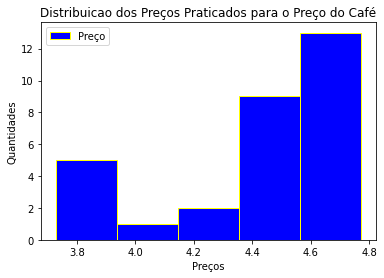

In [24]:
plt.hist(pdados['Preco_Cafe'], bins=5, edgecolor="yellow", color="blue", 
         label = ['Preço'])
plt.title('Distribuicao dos Preços Praticados para o Preço do Café')
plt.legend()
plt.xlabel('Preços')
plt.ylabel('Quantidades')
plt.show() 

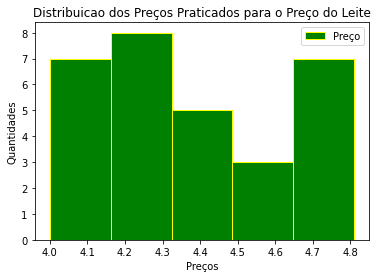

In [25]:
plt.hist(pdados['Preco_Leite'], bins=5, edgecolor="yellow", color="green", 
         label = ['Preço'])
plt.title('Distribuicao dos Preços Praticados para o Preço do Leite')
plt.legend()
plt.xlabel('Preços')
plt.ylabel('Quantidades')
plt.show() 

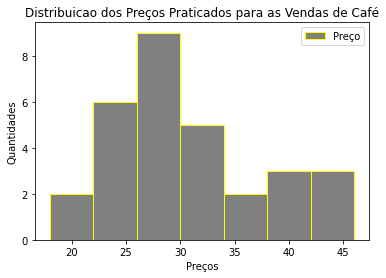

In [26]:
plt.hist(pdados['Vendas_Cafe'], bins=7, edgecolor="yellow", color="grey", 
         label = ['Preço'])
plt.title('Distribuicao dos Preços Praticados para as Vendas de Café')
plt.legend()
plt.xlabel('Preços')
plt.ylabel('Quantidades')
plt.show() 

## R - Histogramas com as Distribuições das Variáveis

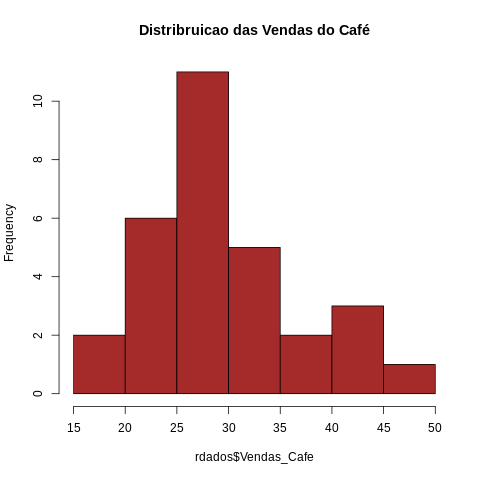

In [27]:
%%R
hist(rdados$Vendas_Cafe,
 col = 'brown',
 main = 'Distribruicao das Vendas do Café')

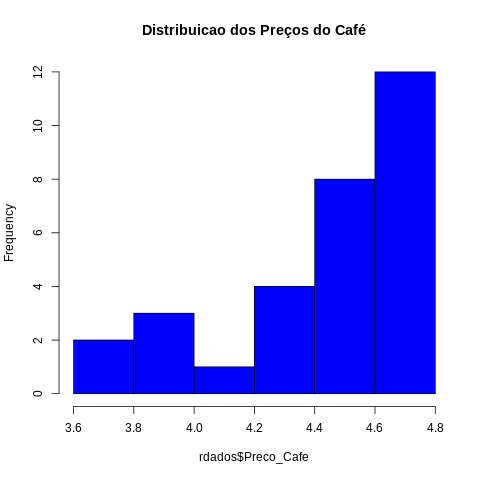

In [28]:
%%R
hist(rdados$Preco_Cafe,
 col = 'blue',
 main = 'Distribuicao dos Preços do Café')

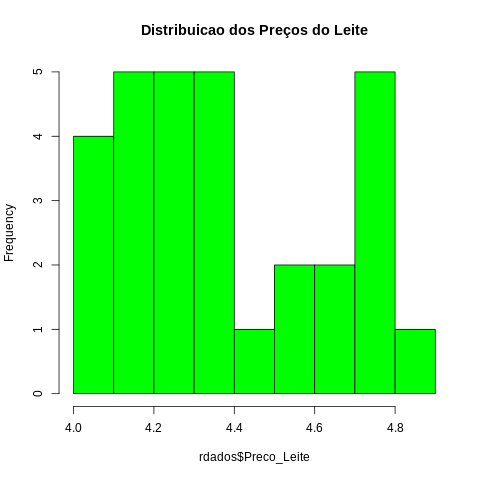

In [29]:
%%R
hist(rdados$Preco_Leite,
 col = 'green',
 main = 'Distribuicao dos Preços do Leite')

#Teste de Shapiro
O Teste de Shapiro-Wilk tem como objetivo avaliar se uma distribuição é semelhante a uma distribuição normal. A distribuição normal também pode ser chamada de gaussiana e sua forma assemelha-se a de um sino. Esse tipo de distribuição é muito importante, por ser frequentemente usada para modelar fenômenos naturais.

Como resultado, o teste retornará a estatística W, que terá um valor de significância associada, o valor-p. Para dizer que uma distribuição é normal, o valor p precisa ser maior do que 0,05.

## R - Teste de Shapiro

In [30]:
%%R
shapiro.test(rdados$Preco_Leite)


	Shapiro-Wilk normality test

data:  rdados$Preco_Leite
W = 0.92365, p-value = 0.0334



## Python - Teste de Shapiro

In [31]:
shapiro(pdados['Preco_Leite'])

(0.923654317855835, 0.03339812532067299)

# Visualização da Relacão entre as Vendas e o Preço do Café

## R - Visualização da Relacão entre as Vendas e o Preço do Café

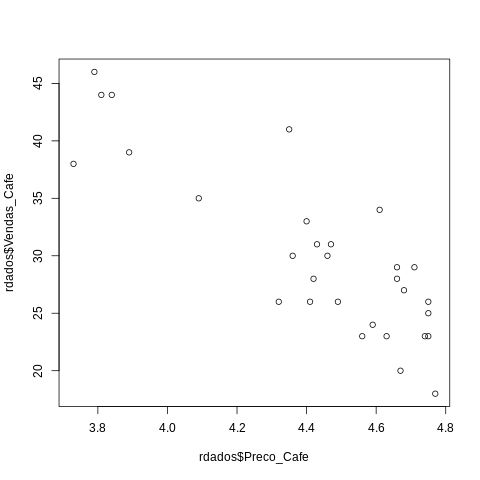

In [32]:
%%R
plot(y = rdados$Vendas_Cafe,
 x = rdados$Preco_Cafe)

##Python - Visualização da Relacão entre as Vendas e o Preço do Café

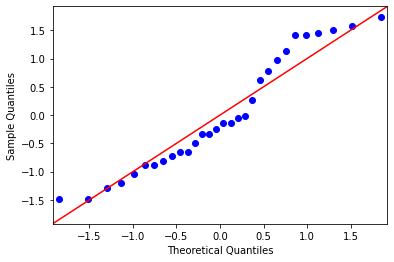

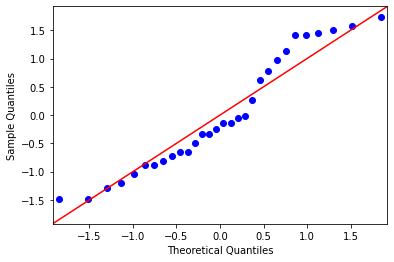

In [33]:
#plotando o gráfico Q-Q plot para visualizar a distribuição
sm.qqplot(pdf['Preco_Leite'], fit=True,line ='45')

#Explorando a Relação entre as variáveis Preço e Vendas do Café


## R - Explorando a Relação entre as Variáveis Preço e Vendas do Café

### Customização  do Gráfico

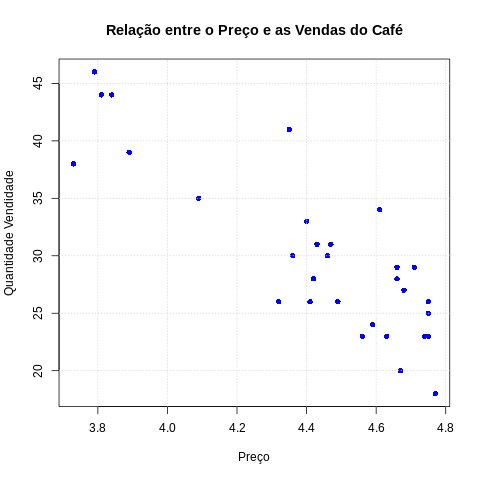

In [34]:
%%R
plot(y = rdados$Vendas_Cafe,
x = rdados$Preco_Cafe,
 pch = 16,
 col = 'blue',
 xlab = 'Preço',
 ylab = 'Quantidade Vendidade',
 main = 'Relação entre o Preço e as Vendas do Café')
grid() #este comando adiciona linhas de grade ao grafico

### Colore os pontos em que havia promoção naquele dia
**Atenção**: rdados$Promocao convertido para Factor

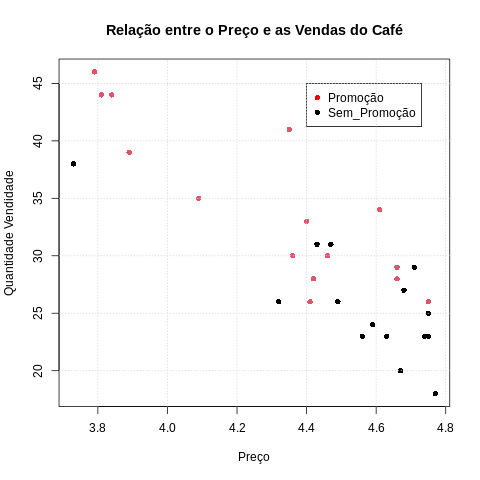

In [35]:
%%R
plot(
 y = rdados$Vendas_Cafe,
 x = rdados$Preco_Cafe,
 col = as.factor(rdados$Promocao),
 pch = 16,
 xlab = 'Preço',
 ylab = 'Quantidade Vendidade',
 main = 'Relação entre o Preço e as Vendas do Café'
 )
 legend(x=4.4,y=45,
 c("Promoção","Sem_Promoção"),
 col=c("red","black"),
 pch=c(16,16))
grid()


### Cria uma nova variavel informando se naquele dia vendeu acima ou abaixo da media histórica

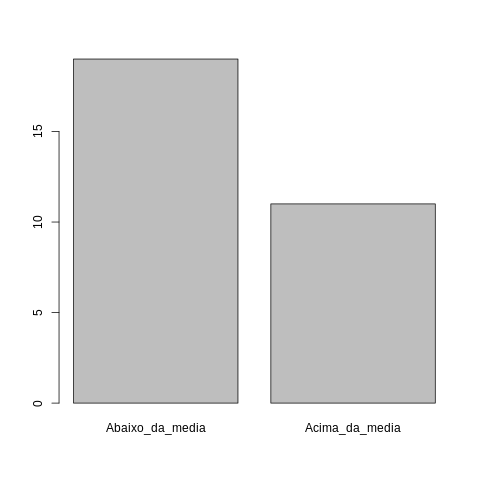

In [36]:
%%R

media <- mean(rdados$Vendas_Cafe) #armazena a media em uma variavel
variavel <- ifelse(rdados$Vendas_Cafe > media,
 'Acima_da_media',
 'Abaixo_da_media')
variavel <- factor(variavel) #converte nova variavel para factor
plot(variavel) #grafico com a qtde abaixo e acima da media


### Visualiza a qtde abaixo e acima da media

In [37]:
%%R
table(variavel) #visualiza a qtde abaixo e acima da media

variavel
Abaixo_da_media  Acima_da_media 
             19              11 


## Python - Explorando a Relação entre as Variáveis Preço e Vendas do Café

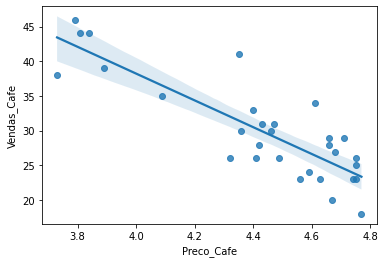

In [38]:
sns.regplot(x="Preco_Cafe", y="Vendas_Cafe", data=pdf);

### Cria uma nova variável informando se naquele dia vendeu acima ou abaixo da media histórica e adiciona ao dataframe

In [39]:
media = pdf['Vendas_Cafe'].mean()
media

30.0

In [40]:
pdf['variavel'] = np.where(pdf['Vendas_Cafe']>media, 'Acima da Media', 'Abaixo da Média')
pdf

,Unnamed: 0,Vendas_Cafe,Preco_Cafe,Promocao,Preco_Leite,variavel
0,0,18,4.77,Nao,4.74,Abaixo da Média
1,1,20,4.67,Nao,4.81,Abaixo da Média
2,2,23,4.75,Nao,4.36,Abaixo da Média
3,3,23,4.74,Nao,4.29,Abaixo da Média
4,4,23,4.63,Nao,4.17,Abaixo da Média
5,5,23,4.56,Nao,4.66,Abaixo da Média
6,6,24,4.59,Nao,4.73,Abaixo da Média
7,7,25,4.75,Nao,4.11,Abaixo da Média
8,8,26,4.75,Sim,4.21,Abaixo da Média
9,9,26,4.49,Nao,4.25,Abaixo da Média


### Visualiza a qtde abaixo e acima da media

In [41]:
pdf.variavel.value_counts()


Abaixo da Média    19
Acima da Media     11
Name: variavel, dtype: int64

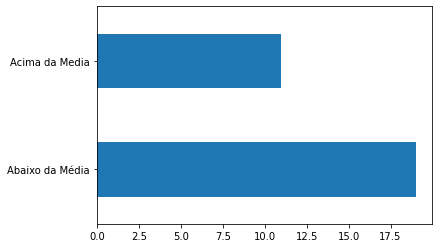

In [42]:
pdf.variavel.value_counts().plot(kind = 'barh')

# Boxplots

## R - Boxplots

###Gera Boxplot das Vendas

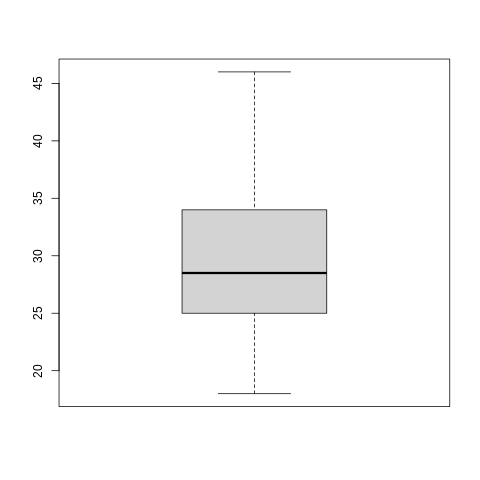

In [43]:
%%R
boxplot(rdados$Vendas_Cafe)

###Gera Boxplot do Preço

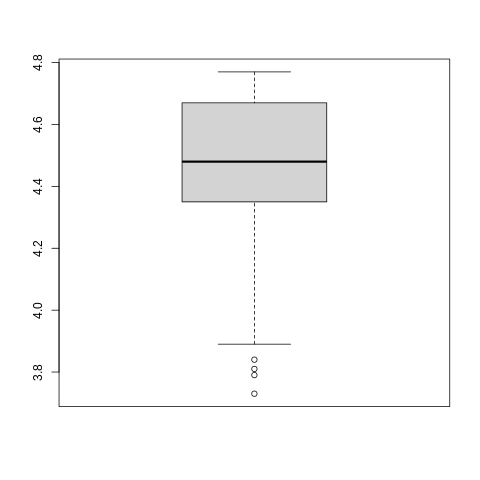

In [44]:
%%R
boxplot(rdados$Preco_Cafe)

###Gera Boxplot Comparativo das Vendas quando houve Promocão e de quando não houve

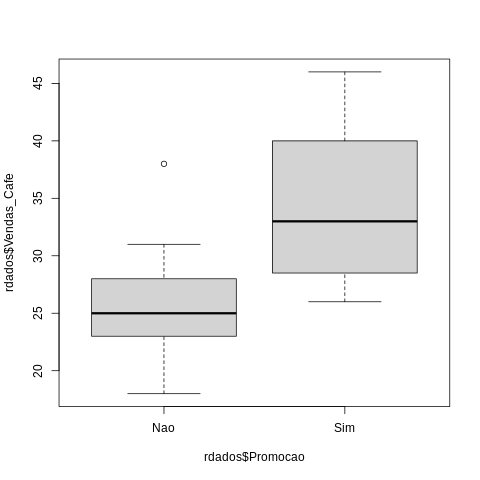

In [45]:
%%R
boxplot(rdados$Vendas_Cafe~rdados$Promocao)

###Customizando o boxplot

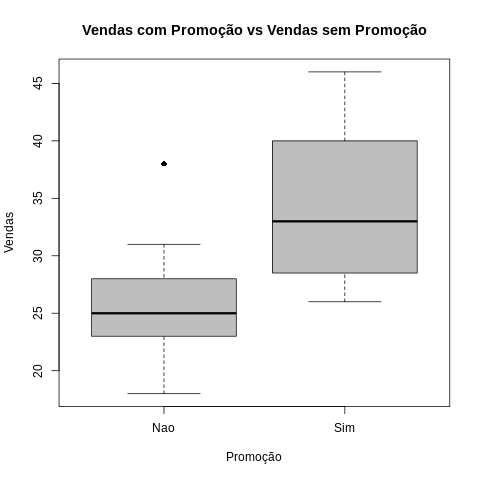

In [46]:
%%R
boxplot(rdados$Vendas_Cafe~rdados$Promocao,
 col = 'gray',
 pch = 16,
 xlab = 'Promoção',
 ylab = 'Vendas',
 main = 'Vendas com Promoção vs Vendas sem Promoção')

## Python - Boxplots

### Gera Boxplot das Vendas de Café

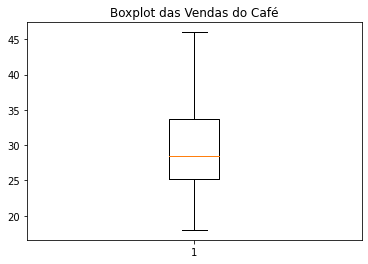

In [47]:
plt.title("Boxplot das Vendas do Café")
plt.boxplot(pdados['Vendas_Cafe'])
plt.show()

### Gera Boxplot dos Preços do Café

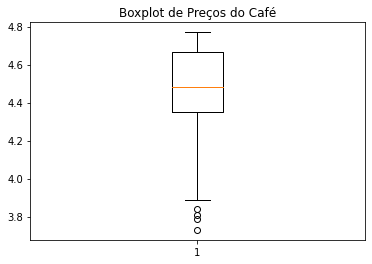

In [48]:
plt.title("Boxplot de Preços do Café")
plt.boxplot(pdados['Preco_Cafe'])
plt.show()

### Gera Boxplot Comparativo das Vendas quando houve Promocão e de Quando não houve

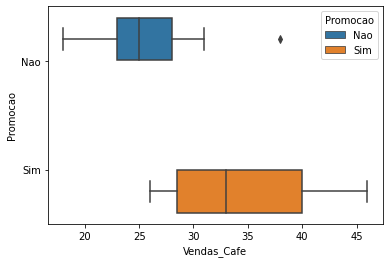

In [49]:
sns.boxplot(x = pdf['Vendas_Cafe'],
			y = pdf['Promocao'],
			hue = pdf['Promocao'])